In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MultipleLocator

In [31]:
data = pd.read_csv('training.csv')
test = pd.read_csv('testing.csv')

In [32]:
X_train = data.drop('Transported', axis=1)
y_train = data['Transported']
X_test = test

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=200000,eval_metric='Accuracy',verbose=5000)

model.fit(X_train, y_train)

Learning rate set to 0.000197
0:	learn: 0.7767002	total: 5.75ms	remaining: 19m 9s
5000:	learn: 0.7962177	total: 16.6s	remaining: 10m 49s
10000:	learn: 0.8027640	total: 34.8s	remaining: 11m 1s
15000:	learn: 0.8073706	total: 53.6s	remaining: 11m
20000:	learn: 0.8106437	total: 1m 11s	remaining: 10m 46s
25000:	learn: 0.8133107	total: 1m 31s	remaining: 10m 37s
30000:	learn: 0.8147654	total: 1m 49s	remaining: 10m 19s
35000:	learn: 0.8169475	total: 2m 7s	remaining: 10m 2s
40000:	learn: 0.8191296	total: 2m 25s	remaining: 9m 43s
45000:	learn: 0.8205843	total: 2m 43s	remaining: 9m 23s
50000:	learn: 0.8245848	total: 3m 1s	remaining: 9m 4s
55000:	learn: 0.8273730	total: 3m 19s	remaining: 8m 44s
60000:	learn: 0.8299188	total: 3m 36s	remaining: 8m 25s
65000:	learn: 0.8334344	total: 3m 54s	remaining: 8m 6s
70000:	learn: 0.8364650	total: 4m 11s	remaining: 7m 47s
75000:	learn: 0.8386471	total: 4m 29s	remaining: 7m 29s
80000:	learn: 0.8402231	total: 4m 47s	remaining: 7m 11s
85000:	learn: 0.8436174	total

In [34]:
answer = model.predict(X_test)

submission = pd.read_csv('sample_submission.csv')
submission['Transported'] = answer
submission.to_csv('Transported_cbc.csv', index = False)
submission.head(20)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
5,0027_01,True
6,0029_01,True
7,0032_01,True
8,0032_02,True
9,0033_01,False


### Another one keras

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = data.drop('Transported', axis=1)
y = data['Transported']
encoder = LabelEncoder()
y_for_train = encoder.fit_transform(y)
y_for_train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(input_shape=[12]),
    layers.Dense(1024, activation='relu', input_shape=[12]),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1024, activation='relu'),    
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid'),
])

In [21]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [22]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

In [23]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=100,
    callbacks=[early_stopping],
)

Epoch 1/100
11/11 [==============================] - 2s 82ms/step - loss: 0.7245 - binary_accuracy: 0.7305 - val_loss: 0.8503 - val_binary_accuracy: 0.5009
Epoch 2/100
11/11 [==============================] - 1s 64ms/step - loss: 0.5756 - binary_accuracy: 0.7593 - val_loss: 0.7991 - val_binary_accuracy: 0.4969
Epoch 3/100
11/11 [==============================] - 1s 63ms/step - loss: 0.5226 - binary_accuracy: 0.7733 - val_loss: 0.6734 - val_binary_accuracy: 0.5263
Epoch 4/100
11/11 [==============================] - 1s 64ms/step - loss: 0.5020 - binary_accuracy: 0.7718 - val_loss: 0.6065 - val_binary_accuracy: 0.6210
Epoch 5/100
11/11 [==============================] - 1s 63ms/step - loss: 0.4799 - binary_accuracy: 0.7836 - val_loss: 0.6058 - val_binary_accuracy: 0.6298
Epoch 6/100
11/11 [==============================] - 1s 63ms/step - loss: 0.4738 - binary_accuracy: 0.7807 - val_loss: 0.5885 - val_binary_accuracy: 0.6636
Epoch 7/100
11/11 [==============================] - 1s 63ms/ste

<AxesSubplot:>

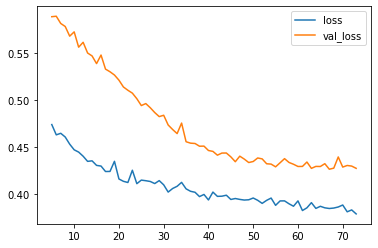

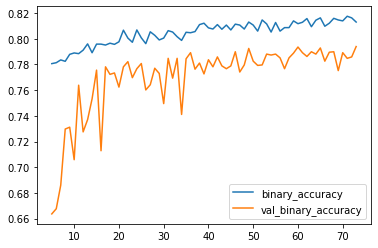

In [24]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

In [25]:
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

Best Validation Loss: 0.4263
Best Validation Accuracy: 0.7940


In [29]:
X_test = test
y_test_tf = (model.predict(X_test) > 0.5).astype('bool')

submission = pd.read_csv('sample_submission.csv')
submission['Transported'] = y_test_tf
submission.to_csv('Transported_keras.csv', index = False)
submission.head(20)

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
5,0027_01,True
6,0029_01,True
7,0032_01,True
8,0032_02,True
9,0033_01,False
